In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

C:\Users\LXL\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


<h2>Define Hyper-parameters</h2>

In [36]:
hidden_size1 = 2
output_size = 2
inp_size = 2
lr = 0.05
max_iter = 100000

<h2>Define your input data and expected labels</h2>

In [37]:
inp = np.array([[0,0],[0,1],[1,0],[1,1]], dtype=np.float32)
label = np.array([[1,0],[0,1],[0,1],[1,0]], dtype=np.float32)
tf.reset_default_graph()

<h2>Define placeholder and Variables</h2>

In [38]:
X = tf.placeholder(dtype=tf.float32, shape=[None, inp_size])
y = tf.placeholder(dtype=tf.float32, shape=[None,2])
W1 = tf.Variable(2*tf.random_uniform(shape=[inp_size, hidden_size1])-1, name='W1')
b1 = tf.Variable(tf.zeros(shape=[hidden_size1]), name='b1')
W2 = tf.Variable(2*tf.random_uniform(shape=[hidden_size1, output_size])-1, name='W2')
b2 = tf.Variable(tf.zeros(shape=[output_size]), name='b2')

<h2>Define the neural network</h2>

In [39]:
def neuralNet(X):
    layer_1_out = tf.nn.tanh(tf.add(tf.matmul(X, W1), b1))
    output = tf.nn.sigmoid(tf.add(tf.matmul(layer_1_out, W2), b2))
    return output

<h2>Define cost function</h2>

In [40]:
logit = neuralNet(X)
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y, logits=logit))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr)
model = optimizer.minimize(loss)

pred = tf.argmax(logit,1)
actual = tf.argmax(y,1)
accuracy = tf.reduce_mean(tf.cast(tf.equal(pred, actual),dtype=tf.float32))
init=tf.global_variables_initializer()

<h2>Execute training</h2>

In [50]:
m=10
x = np.linspace(0,1,m);
Value=np.zeros((m,m))
with tf.Session() as sess:
    sess.run(init)
    for i in range(max_iter):
        sess.run(model, feed_dict={X:inp, y:label})
        if i % 10000 == 0:
            acc = sess.run(accuracy, feed_dict={X:inp, y:label})
            print(str(i)+"th iteration: The accuracy is {:.2f}".format(float(acc)))
    print("training finish")
    for k1 in range(m):
        for k2 in range(m): 
            inp_i=np.array([x[k1],x[k2]], dtype = np.float32)
            inp_i = inp_i.reshape((1, 2))
            Value[k1,k2] = sess.run(pred, feed_dict={X:inp_i})

0th iteration: The accuracy is 0.25
10000th iteration: The accuracy is 1.00
20000th iteration: The accuracy is 1.00
30000th iteration: The accuracy is 1.00
40000th iteration: The accuracy is 1.00
50000th iteration: The accuracy is 1.00
60000th iteration: The accuracy is 1.00
70000th iteration: The accuracy is 1.00
80000th iteration: The accuracy is 1.00
90000th iteration: The accuracy is 1.00
training finish


<h2>Plot</h2>

The approximate decision boundary of the neural network is shown below.

[[0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]]


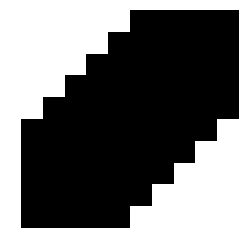

In [56]:
print(Value)
plt.imshow(Value, cmap='Greys', interpolation=None)
plt.axis('off')
plt.show()